In [4]:
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train6/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project = 'models',
    name = 'yolov8/detect/val'
)

Ultralytics YOLOv8.1.45  Python-3.10.4 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning D:\Python code\Computer Vision\yolov8\yolo_data\val\labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]


                   all         26         28      0.492      0.857      0.537      0.348
Speed: 1.0ms preprocess, 148.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to models\yolov8\detect\val2


In [8]:
import cv2
def visualize_bbox(
        img_path, predictions,
        conf_thres = 0.8,
        font = cv2.FONT_HERSHEY_SIMPLEX
):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    for prediction in predictions:
        conf_score = prediction['confidence']

        if conf_score < conf_thres:
            continue
            
        bbox = prediction['box']
        xmin = int(bbox['x1'])
        ymin = int(bbox['y1'])
        xmax = int(bbox['x2'])
        ymax = int(bbox['y2'])


        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

        text = f"{conf_score:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(text, font, 1, 2)

        cv2.rectangle(img, (xmin, ymin - text_height - 5), (xmin + text_width, ymin), (0,255,0), -1)
        cv2.putText(img, text, (xmin, ymin -5), font, 1, (0,0,0),2)

    return img

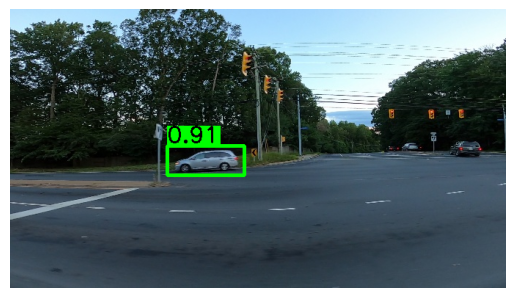

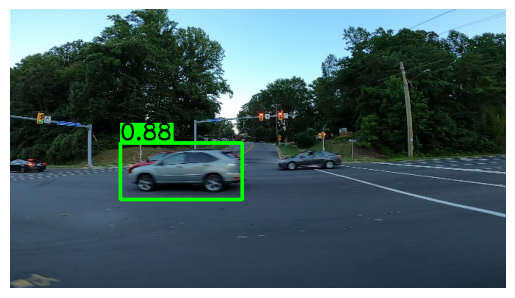

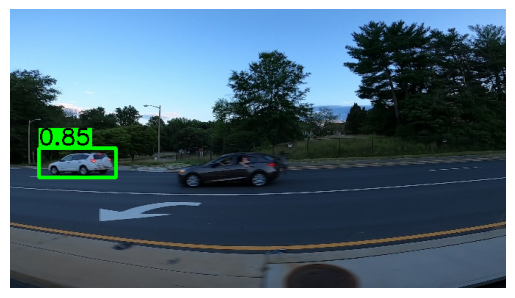

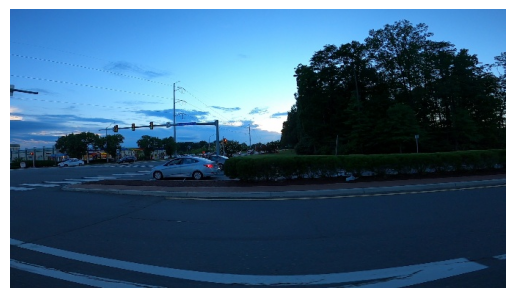

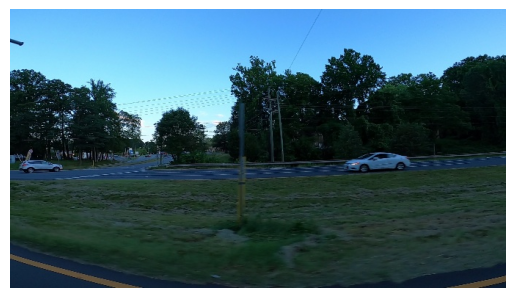

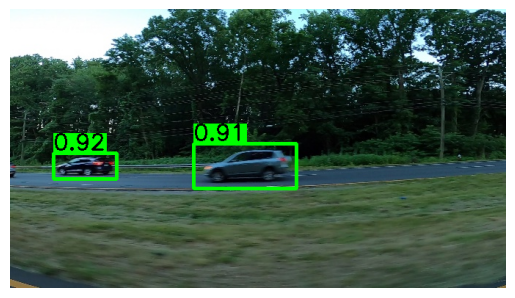

In [9]:
import os
import matplotlib.pyplot as plt
import json
test_img_dir = 'yolo_data/test'


conf_thres =0.75
model = YOLO(model_path)
for img_name in os.listdir(test_img_dir):
    img_path = os.path.join(test_img_dir,img_name)
    # Run inference
    results = model (img_path, verbose = False)
    predictions = json.loads(results[0].tojson())
    visualized_img = visualize_bbox(img_path ,predictions ,conf_thres)
    %matplotlib inline
    plt.imshow(visualized_img)
    plt.axis('off')
    plt.show()
